# Central London Data Science Project Nights
### Optimising training data for urban wind predictions
The focus of this meetup is in finding out different ways in which training data can be structure in order to improve a models accuracy.


### The data
The data supplied is sythetically generated urban wind data from 3 streets. The csv is structure as follows:

street 1 wind speed (m/s), street 1 wind direction (degrees), street 2 wind speed (m/s), street 2 wind direction (degrees), street 3 wind speed (m/s), street 3 wind direction (degrees)

The predicted value is the wind direction of the 3rd street

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

### Load csv data
street1 wind speed, street1 wind direction,street2 wind speed, street2 wind direction,street3 wind speed, street3 wind direction,

In [2]:
f = open("wind.csv")
data = np.loadtxt(f,delimiter=',')
# show first row of data
data[:1],data.shape

(array([[  38.57 ,  126.087,   47.134,   46.155,   19.41 ,  115.275]]),
 (2000, 6))

# Transform the input data function (the fun bit)

In [3]:
def transformInputData(inputData):
    
    # this is where you put explore different ways the data can be structured
    
    # feel free to write one for the output data if needed
    
    return inputData

### Split data into training and test data

In [4]:
# use first 4 columns as the input data to a our model
x_data = transformInputData(data[:,:4])

# use first 1500 rows as training input data
x_train = x_data[:1500]

# use the remaining 500 rows as test input data
x_test = x_data[1500:]

# show first 3 rows of training input data
x_train[:3]

array([[  38.57 ,  126.087,   47.134,   46.155],
       [  26.019,  343.995,   31.961,   54.67 ],
       [  38.568,  129.103,   31.58 ,   67.669]])

In [5]:
# use 5th column as the ouput data to a our model
y_data = data[:,5]

# use first 1500 rows as training ouput data
y_train = y_data[:1500]

# use the remaining 500 rows as test output data
y_test = y_data[1500:]

# show first 3 values of the training output data
y_train[:3]

array([ 115.275,  332.388,  143.187])

### Train model

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% np.mean((regr.predict(x_test) - y_test) ** 2))

Coefficients: 
 [ 0.22249504  0.76446031 -0.17549725 -0.08686491]
Mean squared error: 5106.20


### Plot predictions

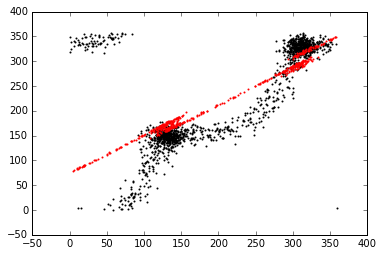

In [7]:
plt.scatter(x_train[:,1], y_train,  color='black', s=1)
plt.scatter(x_test[:,1], regr.predict(x_test),  color='red', s=1)
plt.show()